In [63]:
import pandas as pd

# Leer el archivo Excel
df = pd.read_excel('/content/Water Quality.xlsx')

# Mostrar el DataFrame
df


,FECHA,Temp.,pH,NH4 (mg/l),NH3 (mg/l),NO3 (mg/l),Dureza (mg/L),Alcalinidad,Hierro (ug/L),Mortalidad (N°)
0,2022-10-28,10.5,7.4,0.1,0.000477,1.0,22.0,48.0,101.449795,358
1,2022-10-28,10.2,7.4,0.1,0.000477,1.0,20.0,45.0,89.715676,262
2,2023-03-30,7.4,6.8,0.2,0.000188,1.0,27.0,43.0,99.632428,1072
3,2023-03-31,7.2,6.8,0.1,0.000093,2.0,31.0,45.0,103.925461,2949
4,2023-04-01,8.2,6.8,0.1,0.000100,1.0,30.0,44.0,101.778945,2886
...,...,...,...,...,...,...,...,...,...,...
133,2023-10-01,7.1,7.2,0.1,0.000230,1.0,23.0,44.0,100.229892,14
134,2023-10-02,7.2,7.2,0.1,0.000232,1.0,21.0,39.0,100.290727,6
135,2023-10-03,6.9,7.2,0.1,0.000227,1.0,19.0,41.0,101.510630,2
136,2023-10-04,7.0,7.2,0.1,0.000229,1.0,19.0,41.0,101.778945,1


In [21]:
df.describe()

,FECHA,Temp.,pH,NH4 (mg/l),NH3 (mg/l),NO3 (mg/l),Dureza (mg/L),Alcalinidad,Hierro (ug/L),Mortalidad (N°)
count,138,138.000000,138.000000,137.000000,137.000000,137.000000,137.00000,137.000000,138.000000,138.000000
mean,2023-07-06 03:28:41.739130368,8.042029,7.034638,0.140219,0.000294,1.081022,22.50365,42.306569,100.659100,2142.847826
min,2022-10-28 00:00:00,6.900000,6.400000,0.000000,0.000000,0.000000,11.00000,25.000000,89.715676,1.000000
25%,2023-05-14 06:00:00,7.500000,6.900000,0.100000,0.000156,1.000000,20.00000,41.000000,98.949155,88.250000
50%,2023-07-13 12:00:00,8.000000,7.100000,0.100000,0.000208,1.000000,22.00000,43.000000,100.149398,213.000000
75%,2023-08-29 18:00:00,8.400000,7.100000,0.200000,0.000369,1.000000,25.00000,44.000000,101.772701,612.000000
max,2023-10-05 00:00:00,11.100000,7.900000,0.300000,0.002362,2.000000,58.00000,59.000000,114.378842,62402.000000
std,NaN,0.815167,0.258356,0.058567,0.000323,0.419301,5.42885,2.824686,2.961195,7716.516044


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   FECHA            138 non-null    datetime64[ns]
 1   Temp.            138 non-null    float64       
 2   pH               138 non-null    float64       
 3   NH4 (mg/l)       137 non-null    float64       
 4   NH3 (mg/l)       137 non-null    float64       
 5   NO3 (mg/l)       137 non-null    float64       
 6   Dureza (mg/L)    137 non-null    float64       
 7   Alcalinidad      137 non-null    float64       
 8   Hierro (ug/L)    138 non-null    float64       
 9   Mortalidad (N°)  138 non-null    int64         
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 10.9 KB


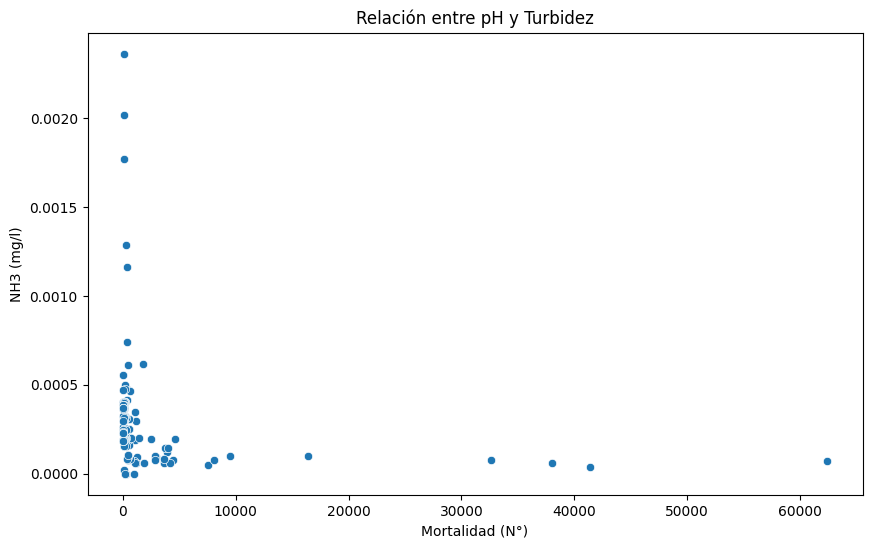

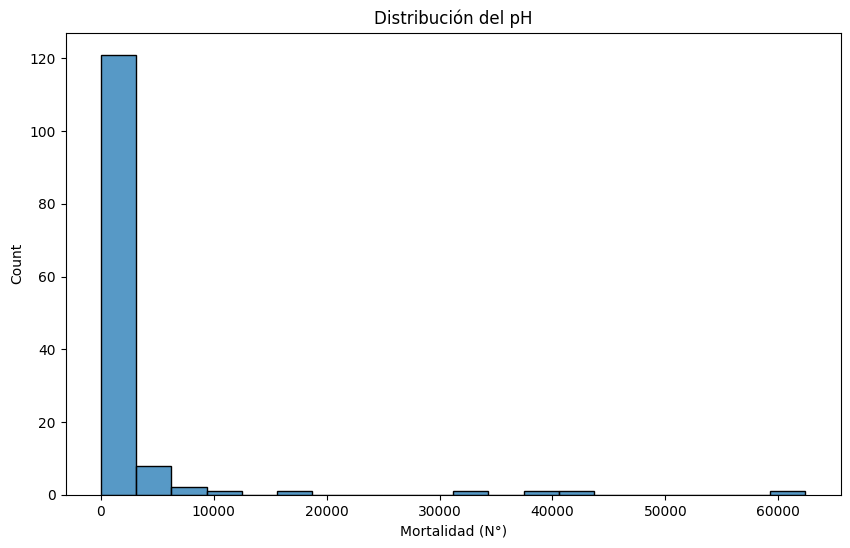

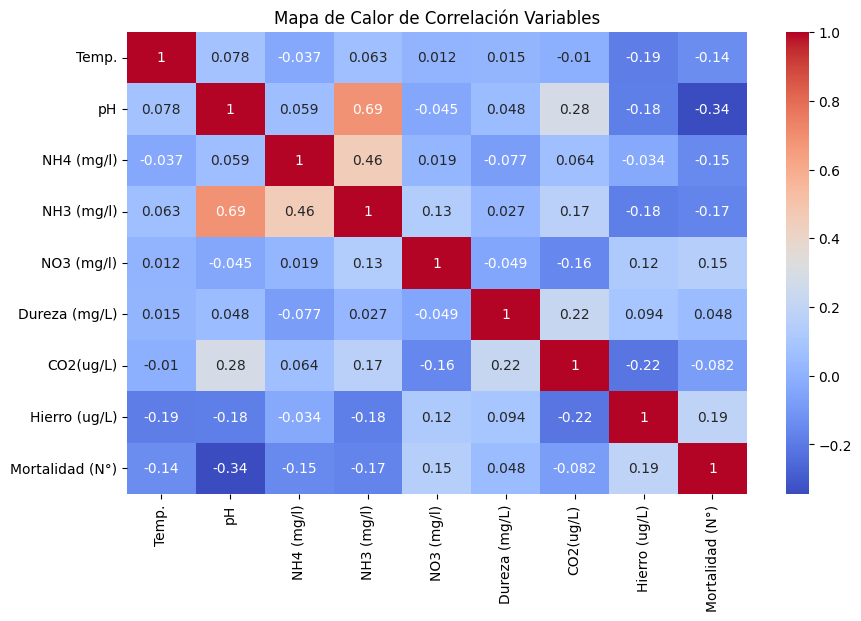

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de dispersión para visualizar la relación entre dos variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mortalidad (N°)', y='NH3 (mg/l)', data=df)
plt.title('Relación entre NH3 (mg/L) y Mortalidad (N°)')
plt.show()

# Histograma para visualizar la distribución de una variable
plt.figure(figsize=(10, 6))
sns.histplot(df['Mortalidad (N°)'], bins=20)
plt.title('Distribución del pH')
plt.show()



# Mapa de calor para visualizar la correlación entre variables
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación Variables')
plt.show()


In [42]:
# Eliminar filas con valores NaN
df.dropna(inplace=True)


In [61]:
# prompt: linear regression para predecir Mortalidad

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Seleccionar las características (X) y la variable objetivo (y)
# Eliminar la columna 'Fecha'
#df = df.drop('FECHA', axis=1)

# Definir las características (X) y la variable objetivo (y)
X = df.drop('Mortalidad (N°)', axis=1)
y = df['Mortalidad (N°)']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)

# Imprimir la ecuación de la regresión lineal
print("Intersección:", model.intercept_)
print("Coeficientes:", model.coef_)


Error cuadrático medio (MSE): 40508758.06153576
Coeficiente de determinación (R^2): 0.33491460009928253
Intersección: 62558.46458013844
Coeficientes: [-1.00074379e+03 -1.43168661e+04 -3.30239946e+04  6.88755779e+06
  9.76782063e+02  1.65366046e+01  1.71737539e+02  4.20871376e+02]


In [44]:
# prompt: random forest regressor para predecir la mortalidad

from sklearn.ensemble import RandomForestRegressor

# Seleccionar las características (X) y la variable objetivo (y)
# Eliminar la columna 'Fecha'
#df = df.drop('FECHA', axis=1)

# Definir las características (X) y la variable objetivo (y)
X = df.drop('Mortalidad (N°)', axis=1)
y = df['Mortalidad (N°)']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)


Error cuadrático medio (MSE): 54742140.300521426
Coeficiente de determinación (R^2): 0.10122649976366183


  Característica  Importancia
3     NH3 (mg/l)     0.396645
7  Hierro (ug/L)     0.249888
1             pH     0.101204
6      CO2(ug/L)     0.080636
0          Temp.     0.065744
5  Dureza (mg/L)     0.060436
4     NO3 (mg/l)     0.042770
2     NH4 (mg/l)     0.002676


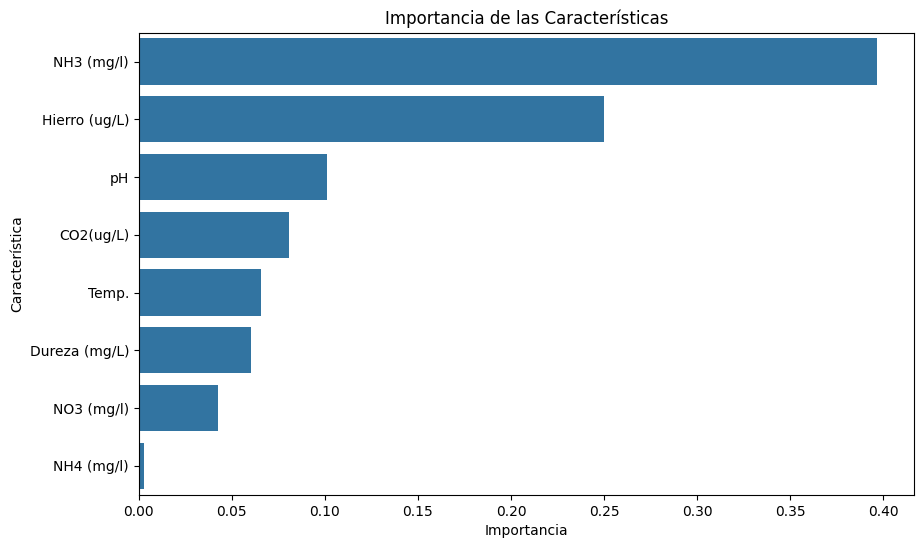

In [45]:

# Obtener la importancia de las características
feature_importances = model.feature_importances_

# Crear un DataFrame para visualizar la importancia de las características
feature_importance_df = pd.DataFrame({'Característica': X.columns, 'Importancia': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False)

# Mostrar la importancia de las características
print(feature_importance_df)

# Gráfico de barras para visualizar la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Característica', data=feature_importance_df,label=True)
plt.title('Importancia de las Características')
plt.show()


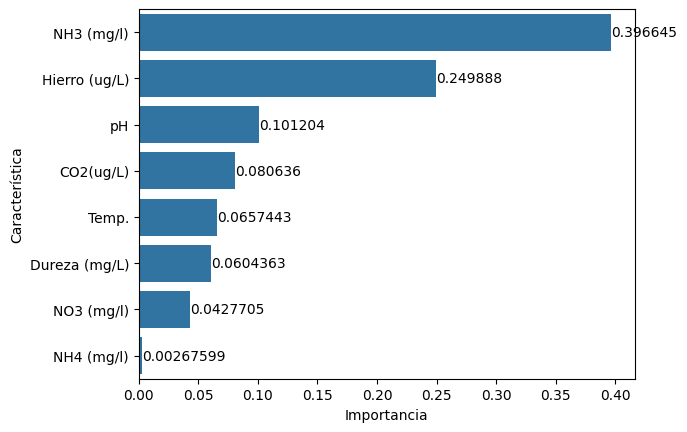

In [60]:
ax = sns.barplot(x='Importancia', y='Característica', data=feature_importance_df, legend="auto")
ax.bar_label(ax.containers[0], fontsize=10);